In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
import scipy
from scipy import stats
from tqdm import tqdm

In [2]:
# Import music data from csv
datafile = './proj1_spotify_data_v01.csv'

spotify_data = pd.read_csv(datafile)

In [3]:
# Data cleaning to drop prev. index column
spotify_data.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
# Create a new column to categorize duration as short, radio-ready, or long
spotify_data['duration_cat'] = pd.cut(spotify_data['duration'], bins=[0, 120000, 240000, float('inf')], labels=['short', 'radio-ready', 'long'])

In [5]:
# Convert duration column from seconds to minutes and seconds
spotify_data['timestamp'] = spotify_data['duration'].apply(lambda x: '{:02d}:{:02d}:{:02d}'.format((x // 60000), (x // 1000) % 60, x % 1000 // 10))

In [6]:
spotify_data['duration'] = spotify_data['duration']/60000

In [7]:
spotify_data['quarter'] = pd.PeriodIndex(spotify_data['date'], freq='Q')

In [8]:
spotify_data['artists'] = spotify_data['artists'].str.replace('$', r'\$', regex=True)

In [10]:
spotify_data.head(10)

,week number,year,month,day,date,country,position,streams,track_id,artists,artist_genres,duration,explicit,name,duration_cat,timestamp,quarter
0,12,2015,11,26,2015/11/26,se,173,103158,0nrRP2bk19rLc0orkWPQk2,['Avicii'],"['pop rap', 'pop', 'pop dance', 'dance pop', '...",4.123767,False,Wake Me Up,long,04:07:42,2015Q4
1,12,2015,11,26,2015/11/26,be,174,11079,0nrRP2bk19rLc0orkWPQk2,['Avicii'],"['pop rap', 'pop', 'pop dance', 'dance pop', '...",4.123767,False,Wake Me Up,long,04:07:42,2015Q4
2,12,2015,11,26,2015/11/26,co,184,19779,0nrRP2bk19rLc0orkWPQk2,['Avicii'],"['pop rap', 'pop', 'pop dance', 'dance pop', '...",4.123767,False,Wake Me Up,long,04:07:42,2015Q4
3,12,2015,11,26,2015/11/26,pe,199,12019,0nrRP2bk19rLc0orkWPQk2,['Avicii'],"['pop rap', 'pop', 'pop dance', 'dance pop', '...",4.123767,False,Wake Me Up,long,04:07:42,2015Q4
4,12,2015,11,26,2015/11/26,cr,143,8688,0nrRP2bk19rLc0orkWPQk2,['Avicii'],"['pop rap', 'pop', 'pop dance', 'dance pop', '...",4.123767,False,Wake Me Up,long,04:07:42,2015Q4
5,12,2015,11,26,2015/11/26,sv,189,1958,0nrRP2bk19rLc0orkWPQk2,['Avicii'],"['pop rap', 'pop', 'pop dance', 'dance pop', '...",4.123767,False,Wake Me Up,long,04:07:42,2015Q4
6,12,2015,11,26,2015/11/26,co,56,42756,236RkCUAucOj7QXfeVWOfA,['Manuel Medrano'],"['latin pop', 'colombian pop']",4.144783,False,La Mujer Que Bota Fuego,long,04:08:68,2015Q4
7,12,2015,11,26,2015/11/26,fi,114,43413,4POiVEKmbznRTn9t3rFkZi,['J. Karjalainen'],"['laulaja-lauluntekija', 'suomi rock', 'finnis...",4.968667,False,Koska taas nähdä sut saan?,long,04:58:12,2015Q4
8,12,2015,11,26,2015/11/26,ec,149,7068,6razrc9pRZCxhk8dEFdMSR,"['Dayme y El High', 'Kenai', 'Kevin Roldan', '...","['latin hip hop', 'reggaeton colombiano', 'per...",3.684367,False,"Practicalo (feat. Kenai, Kevin Roldan & Mackie)",radio-ready,03:41:06,2015Q4
9,12,2015,11,26,2015/11/26,nl,171,62903,350ByQagEOTePjCZofT19C,"['Eva Simons', 'Konshens']","['electropop', 'modern reggae', 'traphall', 'd...",3.233333,False,Policeman - Radio Edit,radio-ready,03:14:00,2015Q4


### Charting 2015-2021 Music by Duration

[None]

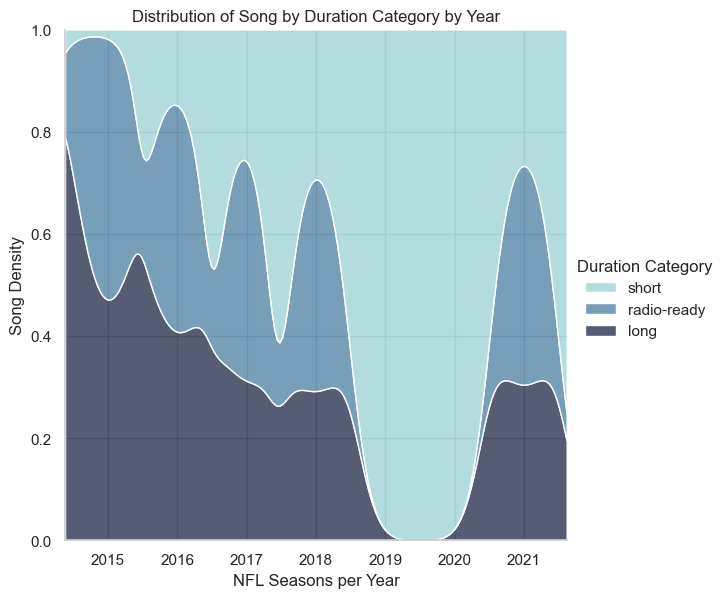

In [121]:
# Chart Aestetics
sns.set_theme(style="whitegrid")

# Chart Contents 
MbD = sns.displot(
    data=spotify_data,
    x='year', hue='duration_cat', 
    kind='kde', height=6,
    multiple="fill", clip=(0,None),
    palette="ch:rot=-.25,hue=1,light=.75",
    common_norm=False
    )

# Chart Legends
MbD.set(
    xlabel='NFL Seasons per Year',
    ylabel = 'Song Density',
    title='Distribution of Song by Duration Category by Year'
)
MbD._legend.set(
    title='Duration Category'
)

[None]

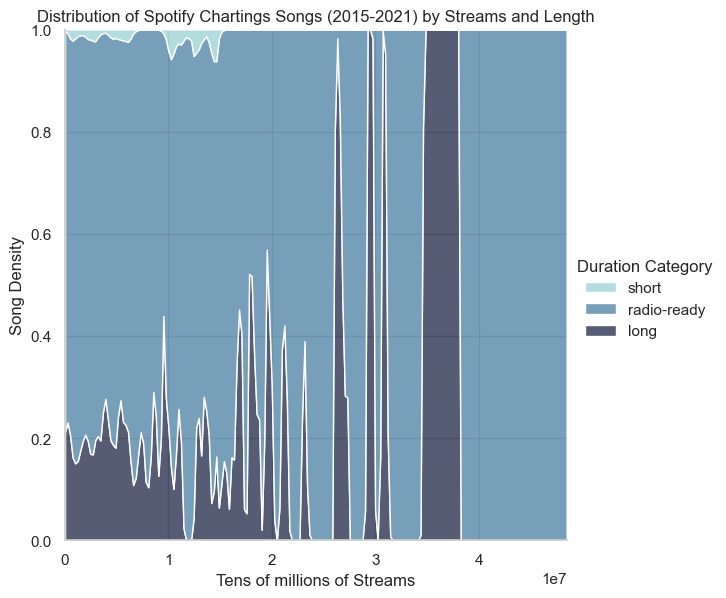

In [124]:
# Chart Aesthetics
sns.set_theme(style="whitegrid")

# Chart Contents 
MbD = sns.displot(
    data=spotify_data,
    x='streams', hue='duration_cat', 
    kind='kde', height=6,
    multiple="fill", clip=(0,None),
    palette="ch:rot=-.25,hue=1,light=.75",
    common_norm=True
    )

# Chart Legends
MbD.set(
    xlabel='Tens of millions of Streams',
    ylabel = 'Song Density',
    title='Distribution of Spotify Chartings Songs (2015-2021) by Streams and Length'
)
MbD._legend.set(
    title='Duration Category'
)

### Observations 

1. Between the seasons, there is a consistent peak of longer songs, most likely due to the holidays. 
2. Between the 2019 and 2020 NFL seasons, there was a monopoly of short songs (under 2 minutes) in the spotify charts. 
3. The majority of the songs charting via streaming (spotify) are songs that are radio-ready, implying that even with the advent of digital streaming, there is a legacy relationship between the songs that are "radio ready " (between 2 and 3 minutes)

#### Regarding the 3-minute "limit" 

> There have always been some type of restriction as it relates to the vehicle that carries music, ie. the storage technology. 

- The phonograph disc, which rotated at 78rpm could hold about 3 minutes. 
- In the 1960's, where the smaller disc which rotated at 45rpm could hold about 3 minutes. 
- In the turn of the millenia, CD-ROMS could hold about 20 songs of 3 minutes each

### Charting 2015-2021 Music by Artist

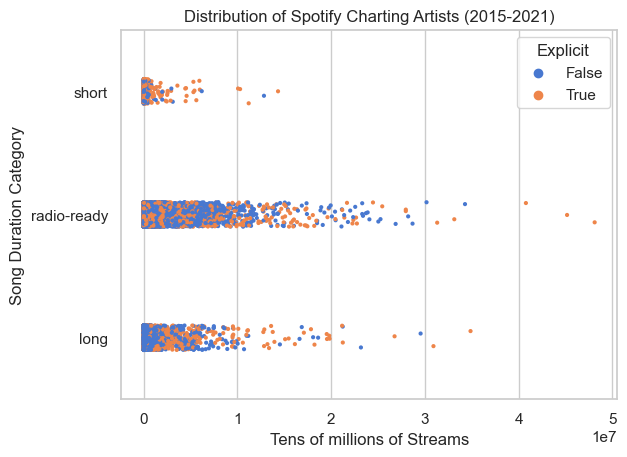

In [24]:
# Chart Aesthetics
sns.set_theme(style="whitegrid", palette="muted")

# Chart Content 
MbA = sns.stripplot(
    data=spotify_data,
    x='streams',
    y='duration_cat',
    hue='explicit',
    size=3
    )

# Set axes labels and title
MbA.set(
    xlabel='Tens of millions of Streams',
    ylabel='Song Duration Category',
    title='Distribution of Spotify Charting Artists (2015-2021)'
)

# Set legend title
MbA.legend().set_title('Explicit')